<a href="https://colab.research.google.com/github/bk3306/upbit-auto01/blob/main/AI_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 11.5 MB/s 


In [32]:
import pyupbit
import time
import datetime

In [62]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2022-02-20 18:00:00,46897000.0,47132000.0,46650000.0,46709000.0,553.204601,2.592391e+10
2022-02-20 19:00:00,46727000.0,47000000.0,46706000.0,46749000.0,228.603114,1.071193e+10
2022-02-20 20:00:00,46733000.0,46923000.0,46680000.0,46870000.0,170.884130,7.989127e+09
2022-02-20 21:00:00,46870000.0,47250000.0,46723000.0,46723000.0,240.850825,1.131389e+10
2022-02-20 22:00:00,46744000.0,46955000.0,46676000.0,46815000.0,177.742271,8.315804e+09
...,...,...,...,...,...,...
2022-02-28 21:00:00,46950000.0,47302000.0,46800000.0,46929000.0,201.832032,9.502017e+09
2022-02-28 22:00:00,46857000.0,46995000.0,46565000.0,46692000.0,210.009676,9.818130e+09
2022-02-28 23:00:00,46703000.0,48669000.0,46660000.0,48612000.0,988.008613,4.732121e+10
2022-03-01 00:00:00,48612000.0,49719000.0,48334000.0,49638000.0,1358.002145,6.676128e+10


In [63]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-02-20 18:00:00,46709000.0
1,2022-02-20 19:00:00,46749000.0
2,2022-02-20 20:00:00,46870000.0
3,2022-02-20 21:00:00,46723000.0
4,2022-02-20 22:00:00,46815000.0
...,...,...
195,2022-02-28 21:00:00,46929000.0
196,2022-02-28 22:00:00,46692000.0
197,2022-02-28 23:00:00,48612000.0
198,2022-03-01 00:00:00,49638000.0


In [64]:
#prophet 불러옴
from fbprophet import Prophet

In [65]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [66]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

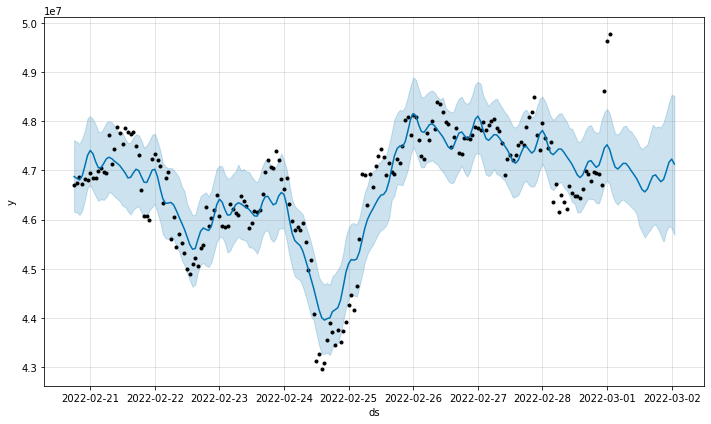

In [67]:
#그래프1
fig1 = model.plot(forecast)

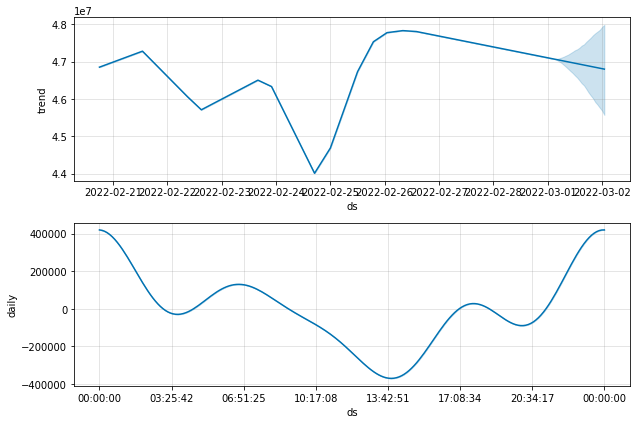

In [68]:
#그래프2
fig2 = model.plot_components(forecast)

In [69]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

49715000.0

In [70]:
def get_start_time(ticker):
    """시작 시간 조회"""
    df = pyupbit.get_ohlcv(ticker, interval="minute60", count=1)
    start_time = df.index[0]
    return start_time

start_time = get_start_time("KRW-BTC")
end_time = start_time + datetime.timedelta(hours=1)
print (end_time)

2022-03-01 02:00:00


In [71]:
end_time_hour = end_time.hour
print(end_time_hour)

2


In [72]:
#1시간 후의 종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=end_time.hour)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=end_time.hour)]

#어쨋든 당일 1시간 후 종가
closeValue = closeDf['yhat'].values[0]
closeValue

47224281.78654962

In [73]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  49715000.0
종가의 가격:  47224281.78654962
